# Assignment 2

Please read the following instructions carefully:

This assignment will test your knowledge of machine learning, data visualisation, and computer vision techniques in Python. This will primarily focus on scikit-learn, seaborn/matplotlib and skimage/opencv, and how to program using these packages and as such you should use the appropriate functionality provided by the packages. You may also use Numpy, panda, etc. where appropriate for some questions. Do not use any other external packages other than these.

In the below questions you will generally need to complete the code in the cell below the question and output the required results, charts or graphs.

Questions 1-5 are each worth 5 marks.

#### 1. Load/download and normalize the FashionMNIST training and test datasets using the instructions shown here: https://github.com/zalandoresearch/fashion-mnist#usage.
#### Please download both the training and testing sets, and load the training images, training labels, testing images, and testing labels as 'x_train', 'y_train', 'x_test', and 'y_test, correspondingly.
    
#### And show some training images by visualising a few images from the training set.

In [15]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

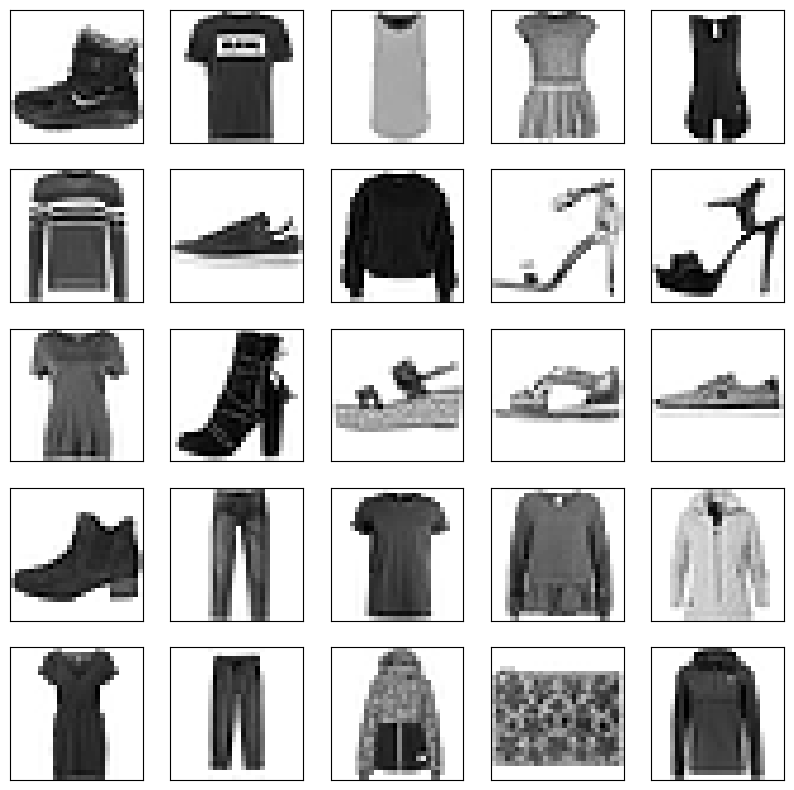

In [16]:
from tensorflow.keras.datasets import fashion_mnist
# To load fashion_mnist data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# To normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# To display 5 images from training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
# to see output
plt.show()


#### 2. Please show 5 images from the training set in a row (similar to what you have done above), but this time also show the corresponding category name (e.g. T-shirt, Dress, Bag, etc., detailed definition of the categories is list on the dataset link above) on top of each image as its title.



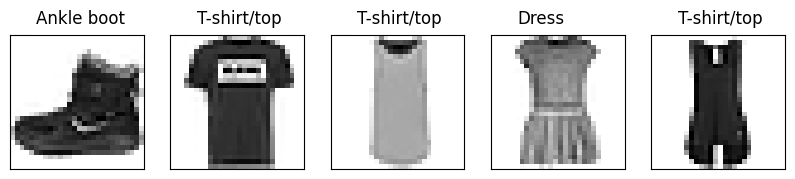

In [17]:
# Description of labels
fashion_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
# to set the size of images
plt.figure(figsize=(10,2))
# to see the 5 images training set in a row
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # This shows the category name on the top of each name
    plt.text(5,-3,fashion_labels[y_train[i]],fontsize=12, color='black', backgroundcolor='white')
plt.show()

#### 3. Apply a support vector classifier on the above (training) data. And use the learned/trained classifier to predict the category value on the test set.
#### The parameters to be used in the SVM classifier are: linear kernel, regularization of 0.025, and all others by default.

#### If you find the training over the whole training set takes too much time (e.g. > 10 minutes), you may only use the first 10,000 samples of the training set instead.

#### Please also show 5 examples from the test set, with the title being "predicted category name (ground-truth category name)", e.g. "Shirt (Shirt)".

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.76      0.76      0.76      1000
           3       0.84      0.88      0.86      1000
           4       0.75      0.79      0.77      1000
           5       0.94      0.94      0.94      1000
           6       0.66      0.55      0.60      1000
           7       0.91      0.93      0.92      1000
           8       0.94      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



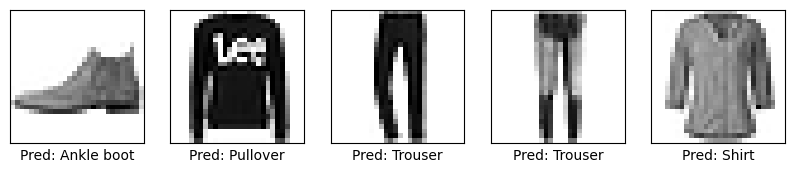

In [18]:
# import important libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To reshape the data for the SVM
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

# Used a subset of training data for faster computation of the code
x_train_subset, _, y_train_subset, _ = train_test_split(x_train_flat, y_train, train_size=10000, random_state=42)

# To initialize and train the classifier of svm
svm_classifier = SVC()
svm_classifier.fit(x_train_subset, y_train_subset)

# To predict on the test_set
y_pred_svm = svm_classifier.predict(x_test_flat)

# To see classification report
print(classification_report(y_test, y_pred_svm))

# To display some random test images with predictions
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f'Pred: {fashion_labels[y_pred_svm[i]]}')
plt.show()


#### 4. Similar to above, but use a neural network (i.e. MLP classifier) for the classification task, and training it for 1000 maximum numebr of iterations, with the L2 penalty of 1.
#### First use the same 10,000 training samples, then change the number of training samples to the whole training set. Think about the difference between this classifier and the above SVM classifier.

#### Please also show 5 samples from the test set (same as above), and also print the text report of the main classification metrics. Think about how does it differ from the results in the above SVM classification model (i.e. you need to print out the classification metrics for the above SVM model to compare).

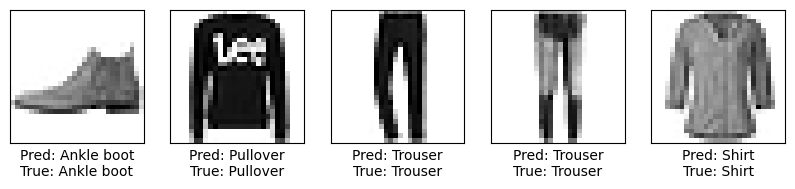

Classification Report (Subset-Trained MLP Classifier):

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1000
           1       0.99      0.95      0.97      1000
           2       0.72      0.80      0.76      1000
           3       0.84      0.88      0.86      1000
           4       0.81      0.67      0.73      1000
           5       0.94      0.91      0.92      1000
           6       0.60      0.68      0.64      1000
           7       0.91      0.90      0.91      1000
           8       0.96      0.92      0.94      1000
           9       0.89      0.95      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000


Classification Report (Full-Trained MLP Classifier):

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.

In [19]:
# import library for mlp
from sklearn.neural_network import MLPClassifier

# TO select a subset of the training data of first 10,000 samples as requirment.
x_train_subset = x_train[:10000].reshape(-1, 28*28)
y_train_subset = y_train[:10000]

# class_descriptions = [
#     "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
#     "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
# ]

# to train an MLP classifier with 1000 max. iterations and L2 penalty of 1
mlp_classifier_subset = MLPClassifier(max_iter=1000, alpha=1)
mlp_classifier_subset.fit(x_train_subset, y_train_subset)

# to test the classifier on the test data
x_test_flattened = x_test.reshape(-1, 28*28)
y_pred_subset = mlp_classifier_subset.predict(x_test_flattened)

# Show 5 sample images from the test set with their predicted and true labels(category names)
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {fashion_labels[y_pred_subset[i]]}\nTrue: {fashion_labels[y_test[i]]}")
plt.show()

# to print the classification report for the trained(subset) MLP classifier
print("Classification Report (Subset-Trained MLP Classifier):\n")
print(classification_report(y_test, y_pred_subset))

# to train the MLP classifier on the entire training data set
mlp_classifier_full = MLPClassifier(max_iter=1000, alpha=1)
mlp_classifier_full.fit(x_train.reshape(-1, 28*28), y_train)

# Test the classifier on the test data
y_pred_full = mlp_classifier_full.predict(x_test_flattened)

# to print the classification report for the MLP classifier trained on the entire dataset
print("\nClassification Report (Full-Trained MLP Classifier):\n")
print(classification_report(y_test, y_pred_full))


#### 5. Please apply a Sobel edge detector on the above dataset images (both training and testing), then train the same MLP classifier as above (on the whole new trianing set), show the prediction results of 5 samples from the (new) test set, with the "prediction (ground-truth label)" as title for each sample, and also reprot the main classification matrics.

#### Similarly, apply a bilateral filter (neighborhood diameter 9 and both sigma for color and space set to 85) to the original dataset images (both training and testing), then train the same MLP classifier, show the prediction, and the metrics, same as above. Compare the difference between the original-image-based classification, edge-based classification, and this filtered-image-based classification.

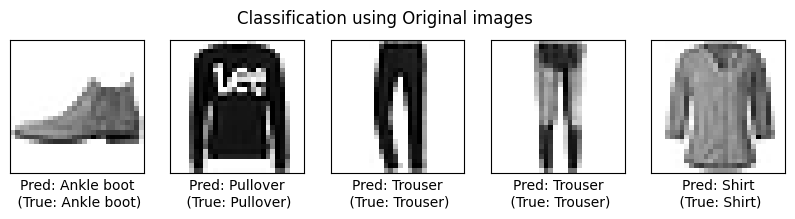

Classification Report using Original images:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1000
           1       0.99      0.94      0.96      1000
           2       0.73      0.77      0.75      1000
           3       0.86      0.86      0.86      1000
           4       0.73      0.81      0.77      1000
           5       0.93      0.93      0.93      1000
           6       0.74      0.52      0.61      1000
           7       0.90      0.93      0.91      1000
           8       0.92      0.96      0.94      1000
           9       0.94      0.93      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



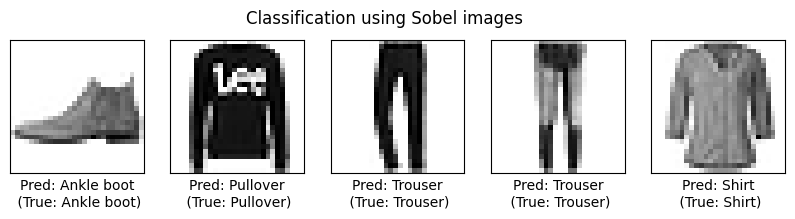

Classification Report using Sobel images:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.95      0.98      0.96      1000
           2       0.78      0.83      0.81      1000
           3       0.87      0.87      0.87      1000
           4       0.79      0.81      0.80      1000
           5       0.93      0.96      0.94      1000
           6       0.73      0.65      0.69      1000
           7       0.94      0.89      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



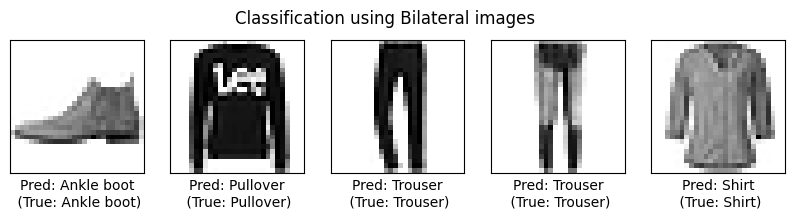

Classification Report using Bilateral images:
              precision    recall  f1-score   support

           0       0.87      0.67      0.75      1000
           1       0.96      0.97      0.97      1000
           2       0.72      0.77      0.74      1000
           3       0.79      0.90      0.84      1000
           4       0.74      0.80      0.77      1000
           5       0.96      0.95      0.95      1000
           6       0.65      0.57      0.61      1000
           7       0.91      0.96      0.93      1000
           8       0.91      0.97      0.94      1000
           9       0.96      0.93      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [28]:
# import library
import cv2

# to define a function to apply Sobel edge detector
def apply_sobel(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    return np.sqrt(sobelx**2 + sobely**2)

# Apply Sobel edge detector to both sets(training and testing)
x_train_sobel = np.array([apply_sobel(img) for img in x_train])
x_test_sobel = np.array([apply_sobel(img) for img in x_test])

# to flatten the Sobel-edged images for the MLP classifier
x_train_sobel_flat = x_train_sobel.reshape(-1, 28*28)
x_test_sobel_flat = x_test_sobel.reshape(-1, 28*28)

# to define a function to apply bilateral filter
def apply_bilateral_filter(img):
    img_uint8 = np.uint8(img * 255)
    return cv2.bilateralFilter(img_uint8, 9, 85, 85)

# Apply bilateral filter to the both sets (training and testing)
x_train_bilateral = np.array([apply_bilateral_filter(img) for img in x_train])
x_test_bilateral = np.array([apply_bilateral_filter(img) for img in x_test])

# to flatten the filtered images for the MLP classifier
x_train_bilateral_flat = x_train_bilateral.reshape(-1, 28*28)
x_test_bilateral_flat = x_test_bilateral.reshape(-1, 28*28)


# to define and train MLP classifiers for each dataset
mlp_classifier_original = MLPClassifier(max_iter=1000, alpha=1)
mlp_classifier_original.fit(x_train_flat, y_train)

mlp_classifier_sobel = MLPClassifier(max_iter=1000, alpha=1)
mlp_classifier_sobel.fit(x_train_sobel_flat, y_train)

mlp_classifier_bilateral = MLPClassifier(max_iter=1000, alpha=1)
mlp_classifier_bilateral.fit(x_train_bilateral_flat, y_train)

# Evaluate the classifiers and display results
classifiers = [("Original", mlp_classifier_original, x_test_flattened),
               ("Sobel", mlp_classifier_sobel, x_test_sobel_flat),
               ("Bilateral", mlp_classifier_bilateral, x_test_bilateral_flat)]

for name, classifier, x_test_data in classifiers:
    y_pred = classifier.predict(x_test_data)

    # Show 5 sample images with their predicted and true labels
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[i], cmap=plt.cm.binary)
        plt.xlabel(f"Pred: {fashion_labels[y_pred[i]]}\n (True: {fashion_labels[y_test[i]]})")
    plt.suptitle(f"Classification using {name} images")
    plt.show()

    # Print the main classification metrics
    print(f"Classification Report using {name} images:")
    print(classification_report(y_test, y_pred))


In [ ]:
                                                          # ---Observations---

In [ ]:
#                                                        ---original images---
# 1-Accuracy is 85%
# 2-Precision and recall vary across different classes, but overall performance is good.
# 3-The F1-score, which is the harmonic mean of precision and recall, is also good.
# 4-Some classes perform better than others.

In [ ]:
#                                                   ---Sobel Edge Detection Images---

# Accuracy is 87%
# Precision and recall have improved for some classes as compared to the original images.
# The edge-based images seem to capture more distinct features for classification, resulting in better performance overall.
# The f1-scores are generally improved(higher) compared to the original images.

In [ ]:
#                                                     ---Bilateral Filtered Images---
# Accuracy is 85%
# The performance is similar to the original images.
# The bilateral filtered images do not seems to provide a significant improvement in classification accuracy compared to the original images.
# Some classes show improved performance, while others show slightly worse performance.

In [ ]:
                        #                                    ---Overall---
                        #  Overall, Sobel edge detection helps improve the accuracy and overall
                        # performance of the MLP classifier compared to the original images. The edge-based images
                        #       capture important structural information that helps in classification.


